# Sammons Mapping
Sammon mapping or Sammon projection is an algorithm that maps a high-dimensional space to a space of lower dimensionality (see multidimensional scaling) by trying to preserve the structure of inter-point distances in high-dimensional space in the lower-dimension projection. It is particularly suited for use in exploratory data analysis. The method was proposed by John W. Sammon in 1969. It is considered a non-linear approach as the mapping cannot be represented as a linear combination of the original variables as possible in techniques such as principal component analysis, which also makes it more difficult to use for classification applications.

Denote the distance between ith and jth objects in the original space by $d_{ij}^{*}$, and the distance between their projections by $d_{ij}$. Sammon's mapping aims to minimize the following error function, which is often referred to as Sammon's stress or Sammon's error:

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wikimedia.org/api/rest_v1/media/math/render/svg/a162a8c19c865869cdb8ec7b0aa6cd0d7e9f3c68")

In [4]:
import numpy as np
import re
import scipy.io
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin"\
                r"\Evolutionary Design\Thesis Chapter\Chapter 2.0\Figures 2.0\Section 8"

## [1] Mapping of the initial population
* serves as an example of how sammons mapping works
* input dimension - 24, output dimension - 2 
* show the alignment of all 50 particles with gradient descent procedure.

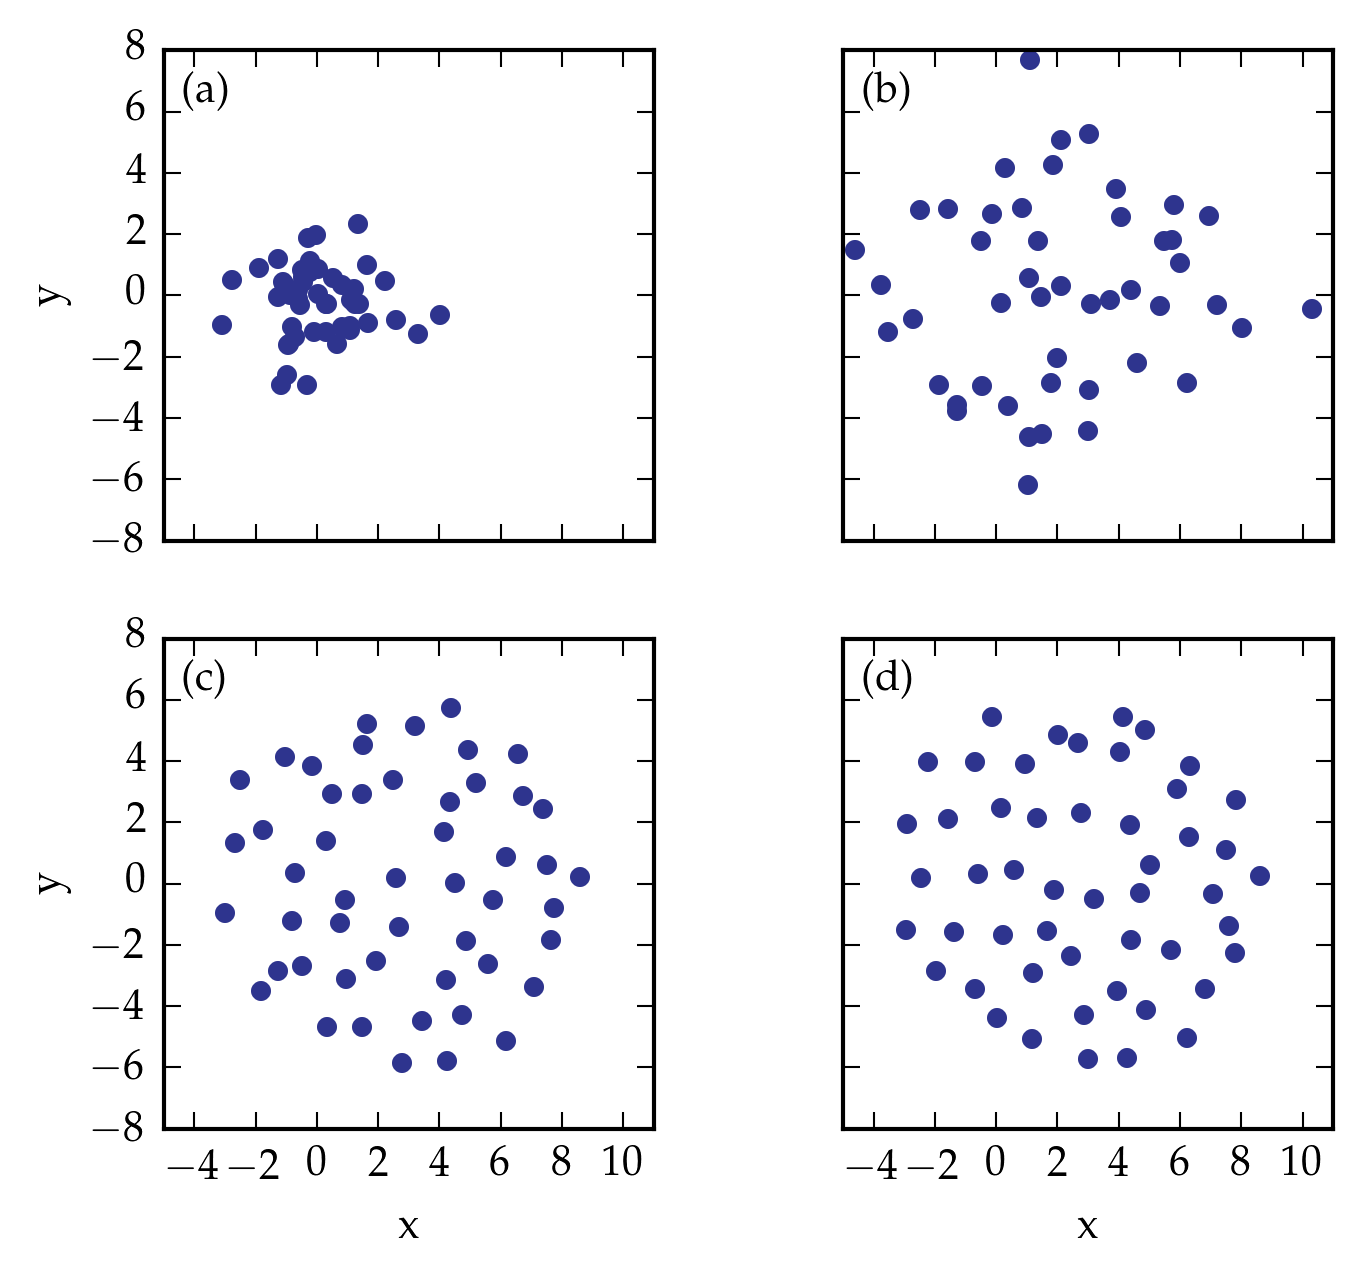

In [14]:
data_dir = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Nitin\Sammon Mapping\Convergence"
file     = data_dir + r"\y_record.mat"

mapped_position = scipy.io.loadmat(file)['y_record']

fullfig(hf = 2.0)
reset_subplots_adjust()

ax1 = plt.subplot(2,2,1,aspect='equal'); ax1.set_xticklabels([])
ax2 = plt.subplot(2,2,2,aspect='equal'); ax2.set_xticklabels([]); ax2.set_yticklabels([])
ax3 = plt.subplot(2,2,3,aspect='equal'); 
ax4 = plt.subplot(2,2,4,aspect='equal'); ax4.set_yticklabels([])

iterations = [0, 4, 16, 64]
ax_list     = [ax1, ax2, ax3, ax4]; ax_count = 0

for i, iter_ in enumerate(iterations):
    ax = ax_list[i]
    for particle in range(50):
        ax.plot(mapped_position[iter_, particle, 0], mapped_position[iter_, particle, 1], 
                'o', color = '#2E348E', markersize = 5, markeredgecolor = 'none' )
        ax.set_xlim([-5, 11]); 
        ax.set_ylim([-8, 8])

        
subplotlabel('(a)', ax=ax1, loc='upper left', size = 10)
subplotlabel('(b)', ax=ax2, loc='upper left', size = 10)
subplotlabel('(c)', ax=ax3, loc='upper left', size = 10)
subplotlabel('(d)', ax=ax4, loc='upper left', size = 10)

ax1.set_ylabel('y'); ax4.set_xlabel('x') 
ax3.set_ylabel('y'); ax3.set_xlabel('x')

plt.savefig(fig_save_path + "\sammon_mapping_initial_population.pdf", format='pdf',
            bbox_inches='tight')       
plt.show()

# [2] Sammon's Stress decay for the initial population

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


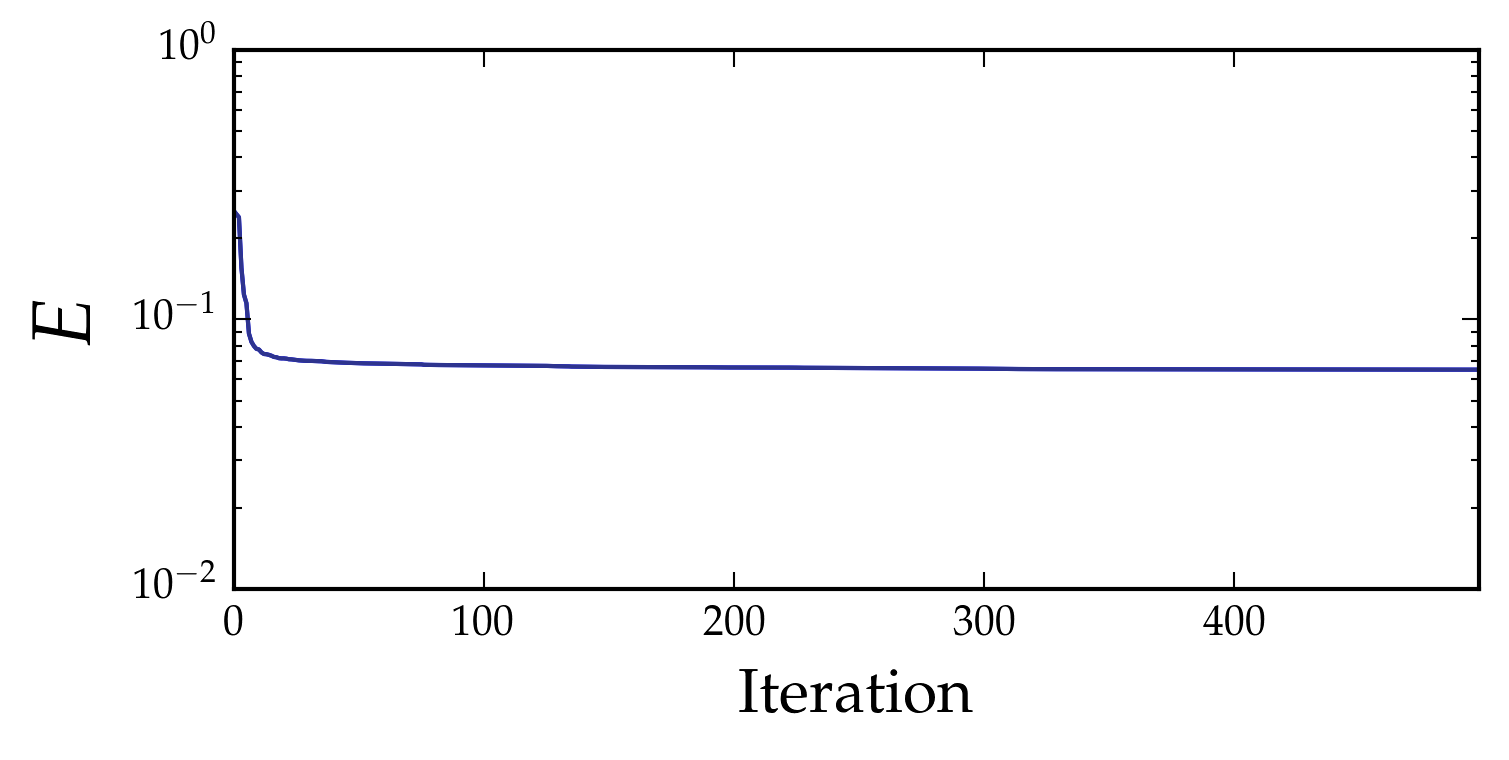

In [29]:
fullfig(); ax = plt.gca()
sammon_stress = scipy.io.loadmat(data_dir + r"\E_record.mat")['E_record']
ax.plot(sammon_stress)
ax.set_xlim([0, 498])
ax.set_ylim([1e-2, 1])
ax.semilogy(sammon_stress, color = '#2E348E')
#ax.yaxis.set_tick_params(pad=-0.25)
ax.set_ylabel(r'$E$', size = 20)
ax.set_xlabel(r'Iteration', size = 15)

plt.savefig(fig_save_path + "\sammonstress_decay_initial_population.pdf", format='pdf',
            bbox_inches='tight')

plt.show()